# Programmieraufgabe 3  

<span style="font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus.</span>

In [51]:
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plt.[name of command]
from numpy import random
from numpy import linalg

random.seed(0)

## a) W&uuml;rfelspiel Seven-Eleven
Simulieren Sie das Casino-W&uuml;rfelspiel Seven-Eleven (Craps).<br>
Dabei wird mit zwei W&uuml;rfeln solange geworfen, bis entweder die
Bank oder der Spieler gewonnen hat. Es sei $Y_k$ die Zufallsgr&ouml;sse f&uuml;r die Augensumme im
$k$-ten Wurf. Der Spieler gewinnt, falls $Y_1 \in \{7, 11\}$ oder $Y_k = Y_1$ f&uuml;r $k \geq 2$. 
Die Bank gewinnt, falls $Y_1 \in \{2, 3, 12\}$ oder $Y_k = 7$ f&uuml;r $k \geq 2$.

<ul>
<li>F&uuml;hren Sie \(10000\) Simulationen des Spiels durch und bestimmen Sie die 
relative Gewinnh&auml;ufigkeit.</li>
<li>Bestimmen Sie zudem die H&auml;aufigkeitsverteilung für die Dauer des Spiels 
bis einer der Zust&auml;nde "Spieler gewinnt" oder "Bank gewinnt" erreicht wird (denn dann terminiert das Spiel). </li>
<li>Bestimmen Sie numerisch den Grenzwert $T^{\ast} = \lim\limits_{k\to \infty} T^k$ und interpretieren Sie die 
  Eintr&auml;ge $T^{\ast}_{1,2}$ und $T^{\ast}_{1,3}$ auch im Hinblick auf Aufgabe 4b). 
    <b>Hinweis: </b> Aufpassen mit der Nullindizierung in Python!
</ul>





Gewinnhaeufigkeit: 0.49400
Mittlere Laenge: 3.35450


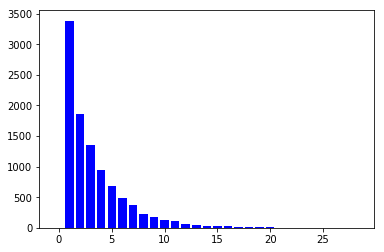

In [52]:
# "initial" ist die Augensumme im ersten Wurf...
# spiel() ist eine Funktion, die die Spielphase nach dem ersten Wurf, simuliert. 
# spiel() soll ein Tupel zurueckgeben, das als erste Komponente "gewonnen" oder "verloren" enthaelt und 
# als zweite Komponente die Laenge des aktuellen Spiels

def spiel(initial):
    steps=1 #number of dice throws
    terminated=False #to stop when won or lost
    if initial in [7,11]: #check if already won
        win=True
        terminated=True
    if initial in [2,3,12]: #check if already lost
        win=False
        terminated=True
    
    while terminated==False:
        steps+=1
        
        dice1=random.randint(1,7,1)
        dice2=random.randint(1,7,1)
        
        y=dice1+dice2
        
        if y==initial: #check wether won
            terminated=True
            win=True
        if y==7: #check wether lost
            terminated=True
            win=False
        
    return win,steps
    
    
#Wie oft gewwinne ich 
count = 0.
#Wie oft wird das Spiel durchgefuehrt
samples = 10000
#Spieldauer in jedem Spiel, mit 0 initialisiert
length = np.zeros(samples)
for i in range(samples):
    w = np.random.randint(1,7,2)
    initial = np.sum(w)
    
    win,steps=spiel(initial)
    
    if win==True:
        count+=1
    
    length[i]=steps
    


#Ausgabe:    

#maximale Spiellaenge
n = 30
h = np.histogram(length,np.arange(0,n))
print('Gewinnhaeufigkeit: %0.5f' % float(count/samples))
print('Mittlere Laenge: %0.5f' % np.mean(length))
#plt.plot(np.arange(0, 100 , 1),hist) 
plt.bar(np.arange(0,n-1), h[0], color="blue");
plt.show()


In [53]:
#Lege die Uebergangsmatrix an
T = np.array([[0 ,2/9 ,1/9 ,5/18 ,4/18,3/18  ],
              [0 ,1   ,0   ,0    ,0    ,0    ],
              [0 ,0   ,1   ,0    ,0    ,0    ],
              [0 ,5/36,6/36,25/36,0    ,0    ],
              [0 ,4/36,6/36,0    ,26/36,0    ],
              [0 ,3/36,6/36,0    ,0    ,27/36]])



#Potenziere die Matrix                
Tk = T
while abs(Tk[0,1]<0.492929):
        Tk=np.matmul(Tk,T) 
print(Tk)


[[0.00000000e+00 4.92929049e-01 5.07070257e-01 2.99052782e-08
  1.34370757e-07 5.30327733e-07]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.54545421e-01 5.45454505e-01 7.47631955e-08
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.99999825e-01 5.99999738e-01 0.00000000e+00
  4.36704960e-07 0.00000000e+00]
 [0.00000000e+00 3.33332538e-01 6.66665076e-01 0.00000000e+00
  0.00000000e+00 2.38647480e-06]]


## b) Irrsprung
Simulieren Sie die zuf&auml;llige Irrfahrt eines Springers auf einem $n \times n$ Schachbrett. Alle m&ouml;glichen R&ouml;sselspr&uuml;nge von einem gegebenen Feld aus sind dabei gleichwahrscheinlich ($\rightarrow$ aufpassen an den Ecken und Kanten!). Die Eingabeparameter sind: $n$ als Schachbrettgr&ouml;sse, $steps$ als Anzahl der Spr&uuml;nge und $samples$ als Anzahl der Versuche. Der Springer wird initial zuf&auml;llig gleichverteilt auf eines der Felder gesetzt. Anschliessend springt der Springer $steps$ oft und landet auf einem Zielfeld. 

<ul>
<li> Z&auml;hlen Sie f&uuml;r jedes Feld wir oft es bei $samples$ Versuchen Zielfeld geworden ist (nach $steps$ Spr&uuml;ngen) und stellen Sie die Ergebnisse graphisch dar. Sie k&ouml;nnen die Felder durchnummerieren und eine 2d-Plot verwenden.</li>

<li> Erzeugen Sie die &Uuml;bergangsmatrix $A$ und n&auml;hern Sie die Grenzverteilung iterativ an. Vergleichen Sie diese mit den relativen H&auml;ufigkeiten. &Auml;ndern Sie auch die Startverteilung.

In [54]:
#Erzeugen des "Uebergangsgraphen" und der Uebergangsmatrix, Parameter $n$ 
#Groesse des Schachbrettes
def init(n):
    l = [] #WTF is l supposed to be?
    A = np.zeros((n*n,n*n))
    for i in range(n):
        for j in range(n):
            #l.append() #WTF is this supposed to do?
            
            #now find all possible jumps from position (i,j)
            pos_jumps=[] #list of possible jump-destinations
            num_pos_jumps=0 #number of possible jumps from that position to determine the probability of each one
            
            #check all directions
            if i+2 in range(n):
                if j+1 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i+2,j+1])
                if j-1 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i+2,j-1])
                    
            if i-2 in range(n):
                if j+1 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i-2,j+1])
                if j-1 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i-2,j-1])
            
            if i+1 in range(n):
                if j+2 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i+1,j+2])
                if j-2 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i+1,j-2])
                    
            if i-1 in range(n):
                if j+2 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i-1,j+2])
                if j-2 in range(n):
                    num_pos_jumps+=1
                    pos_jumps.append([i-1,j-2])
                
            #now add transit probabilities to transit matrix
            for dest in pos_jumps:
                if A[i*n+j,dest[0]*n+dest[1]]!=0:
                    raise ValueError("transition probability already exists") #for debugging
                    
                A[i*n+j,dest[0]*n+dest[1]]+=1/num_pos_jumps
    
          
    return l,A

dsf,dag=init(8)
#Für Untersuchungen beachten: A ist periodisch mit periode 2 !!! 



[ 6042.  8712. 11898. 11941. 11783. 11943.  9003.  5992.  8931. 11924.
 17646. 17752. 17734. 17937. 11815.  8936. 11625. 17972. 23440. 23703.
 23969. 23675. 17970. 12024. 11829. 17899. 23946. 23881. 23841. 23698.
 17925. 11837. 11901. 17560. 23543. 23939. 23779. 24244. 17994. 12025.
 11829. 17864. 23875. 24018. 24060. 24106. 17745. 12114.  8693. 11861.
 17850. 18005. 17989. 17955. 12131.  8945.  5977.  9032. 11660. 12007.
 12108. 11889.  9100.  5979.]


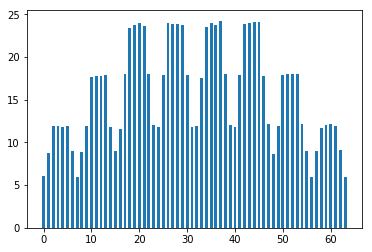

In [55]:
#Simulation
n = 8
steps = 1000
samples = 1000
chess_neighbors,A = init(n)
chess_count = np.zeros(n*n)
for k in range(samples):  
    #insert code here 
    
    i=int(random.randint(0,n,1)) #start at random position
    j=int(random.randint(0,n,1))
    
    chess_count[n*i+j]+=1
    
    for s in range(steps):
    #check all directions
    
        pos_jumps=[] #list of possible jump destinations
        
        if i+2 in range(n):
            if j+1 in range(n):
                pos_jumps.append([i+2,j+1])
            if j-1 in range(n):
                pos_jumps.append([i+2,j-1])
                
        if i-2 in range(n):
            if j+1 in range(n):
                 pos_jumps.append([i-2,j+1])
            if j-1 in range(n):
                   pos_jumps.append([i-2,j-1])
           
        if i+1 in range(n):
            if j+2 in range(n):
                pos_jumps.append([i+1,j+2])
            if j-2 in range(n):
                pos_jumps.append([i+1,j-2])
                    
        if i-1 in range(n):
            if j+2 in range(n):
                pos_jumps.append([i-1,j+2])
            if j-2 in range(n):
                pos_jumps.append([i-1,j-2])
        
        r=int(random.randint(0,len(pos_jumps),1))
        
        i=pos_jumps[r][0]
        j=pos_jumps[r][1]

        
        chess_count[n*i+j]+=1
    
#Ausgabe
print(chess_count)
plt.bar(np.arange(0,n*n,1),chess_count/samples, width=0.6)
plt.show()


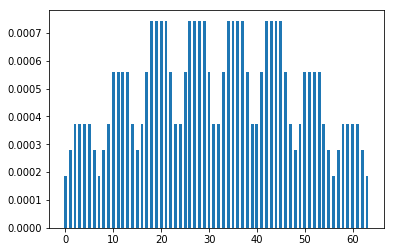

In [57]:
#Startverteilung 
b = np.zeros(n*n)
for l in range(n*n): b[i]=1./(n*n)
    

#insert code here
asdf,A=init(8)

X=np.linalg.matrix_power(A,101)
Y=np.linalg.matrix_power(A,100)
Z=X+Y

res=np.matmul(b,Z)


#Ausgabeplot

#insert code here
plt.bar(np.arange(0,n*n,1),res, width=0.6)
plt.show()


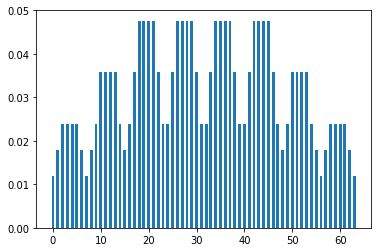

In [58]:
#Startverteilung 
b = np.zeros(n*n)
b[0]=1
    

#insert code here
asdf,A=init(8)

X=np.linalg.matrix_power(A,101)
Y=np.linalg.matrix_power(A,100)
Z=X+Y

res=np.matmul(b,Z)


#Ausgabeplot

#insert code here
plt.bar(np.arange(0,n*n,1),res, width=0.6)
plt.show()